In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
model_names = [
  "ducknet__dice"
]

In [13]:
img_idx = [10, 400, 1326]
original_images = []
true_masks = []
results_by_model = {name: [] for name in model_names}

for idx in img_idx:
  original_images.append(imread(f"drive/MyDrive/CEIA/Trabajo Final/Evaluación Visual/Originales/input_{idx}.png"))
  true_masks.append(imread(f"drive/MyDrive/CEIA/Trabajo Final/Evaluación Visual/Mascaras originales/mask_{idx}.png"))
  for model_name in model_names:
      path = f"drive/MyDrive/CEIA/Trabajo Final/Evaluación Visual/Resultados/{model_name}/mask_{idx}.png"
      results_by_model[model_name].append(imread(path))

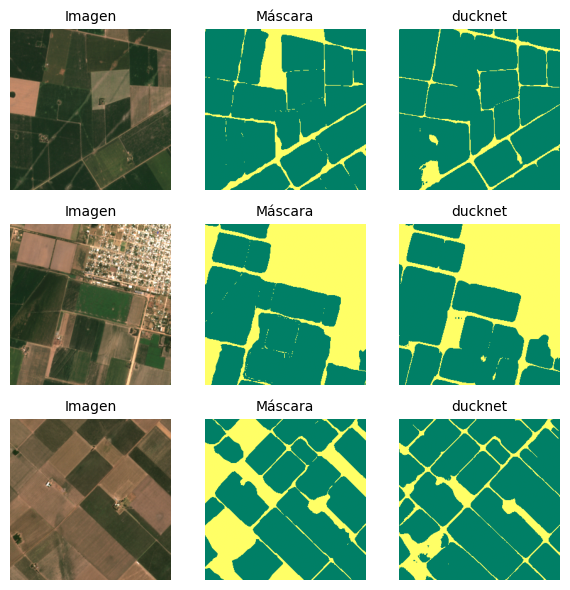

In [14]:
num_images = len(original_images)
model_names = list(results_by_model.keys())
num_models = len(model_names)

figsize = (2, 2)
cmap = 'summer_r'

fig, axes = plt.subplots(num_images, 2 + num_models, figsize=(figsize[0] * (num_models + 2), figsize[1] * num_images))

if num_images == 1:
    axes = axes[None, :]

for i in range(num_images):
    axes[i, 0].imshow(original_images[i], cmap=cmap)
    axes[i, 0].set_title("Imagen", size=10)
    axes[i, 0].axis('off')

    axes[i, 1].imshow(true_masks[i], cmap=cmap)
    axes[i, 1].set_title("Máscara", size=10)
    axes[i, 1].axis('off')

    for j, model_name in enumerate(model_names):
      axes[i, j + 2].imshow(results_by_model[model_name][i], cmap=cmap)
      axes[i, j + 2].set_title(model_name.replace('__dice', '').replace('_', '\n'), size=10)
      axes[i, j + 2].axis('off')

plt.tight_layout()
plt.show()